## Introduction
With the rise of sports analytics, the desire for efficiency and data-driven judgments in recruiting new players for NBA clubs is increasing. We can now look at an extensive list of granular stats that range from the box score statistic, which assesses a player's impact to the team, to basic metrics like offensive rebounds, rather than merely eyeballing a player and judging their surface level playing stats (points, shot attempts, etc.). We may evaluate players using these measurements and determine who would be a good fit for a certain club depending on their attributes.


## Goal
In our project, we will utilize NBA stats to **determine the type of players recruiters should look for based comparing player stats and the trends that occur over time in the NBA.** In order to accomplish this, we will use stats of over 4,000 players from 1950 - 2018 (gathered from: https://tinyurl.com/ybroccrf) and explore the data.

Moreover, we will answer these 3 questions to get a better idea of the ideal NBA player.
1. **What is the average career length a player has? Does it change based on the age started?**
    - This will help answer questions of player's longevity and shine light on who succeeds long term vs short term.
    
    
2. **Which colleges produce the players with the best stats?**
    - While it is hard to compare the intensities in college basketball vs the NBA, colleges with better stats may be an indication of a good basketball program that can output potentially great NBA players. 
    
    
3. **How have basketball roles changed over the years?**
    - For example, if we notice that Centers are becoming more technical over the years, recruiters will want to look for a Center that possesses that technical ability. 
    
## Analysis
#### The Ideal Player
Based on our data, the **ideal NBA player is 255 .lb, 21 - 22.5 year old Center from Louisiana Tech University**. 

#### Breakdown 
1. What is the average length of a player's career? Does it differ depending on when you started?** To begin answering this question, we looked up the frequency of each career length. Surprisingly, we observed a large percentage of players with zero to four years of basketball experience. The NBA's average retirement age is 36 to 39 years old, so this appeared unusual. Did any of the players sustain any injuries? Were they unable to continue in the NBA and so moved to another league? Or did they decide to call it a day? We also looked into if there was a link between the age they started and the length of their careers. We did find a link, and while it may seem counterintuitive, individuals who began around the age of 24 had an average career length of 5 years. This would mean they would retire around 29, far from the average NBA retirement age. As a result, we concluded that 21 - 22.5 was the best age to target. 

![career_age](images/career_age.png)


2. **Which colleges produce the players with the best stats?** Due to the missing data, we first had to do probabilistic imputation to impute the missing values for colleges and birth_date. Once we finished, we merged the player_data with seasons_stats to get the stats for each player. We decided to use a new metric to compare players to each others. This metric is the **player win score**. With this metric, we can give more reasonable weights to certain actions. For example, since the formula for win score is **points + rebounds + steals + .5(assists) + .5(blocked shots) - FG attempts - turnovers - .5(FT attempts) - .5(personal fouls), we can see that certain actions (assists, blocked shots, etc) either give half its value or take away.** Lastly, we decided to remove colleges with 2 or less players to make sure that one amazing player was not the only reason for a college's good performance. 

![colleges](images/colleges)

Louisiana Tech was victorious. It's important to remember that because we used probabilistic imputation, this could alter. However, because it follows the data distribution, only the top 5 are likely to switch with each other. In addition, when we look at the NBA, we rarely see big-name Louisiana Tech alumni. This demonstrates that statistics alone do not always imply good prediction power. On the other hand, it's possible that most people underestimate Louisiana Tech's players.


3. **How have basketball roles changed over the years?** We will analyze 4 characteristics by position and how they changed over time: player win score, 3 point attempts, weight and height. The first two deal with the technical aspects of the game while the last two deal with the physicality. 

![roles](images/combined.jpg)

If we look at the player win score graph (Upper left), we see that Centers have recently begun to have a larger impact in games, more so than any other position. This is very interesting to see as most would think that Guards have the most impact in games. If you look at the 3 point attempts graph (Upper right), the NBA is transitioning into a more shooting based game rather than driving into the paint and doing a layup. Players are looking to shoot more, even centers as well. In terms of weight (Bottom left), the increasing trend in weight may indicate a higher physicality and emphasis on physical conditioning and training. However, the height remains constant, which makes sense as higher height will always be prioritized and there is a threshhold of maximum height for humans. 

## Conclusion
From our analysis and the data, we discovered the ideal age range of NBA rookies to target is 21 - 22.5 years old. Rookies from that age range tend to have longer careers (20) while career length decreases as you increase age. Moreover, players from Lousiana Tech University come out on top for players with the highest "player win score" metric. And when doing analysis of stats by position over time, Centers began having a greater impact on the basktball court. 

It was very interesting to see the correlation between age started and career longevity, which University came up on top, and which positions are having greater importance. However, it is important to understand that correlation does not indicate causation. From this analysis, I think that statistical proverb is most clear with the Lousiana Tech Univeristy example. With a quick analysis, we can see that there are no NBA "greats", albeit it could indicate that players from Lousiana Tech are dreadfully underrated. 

## Code
#### Steps
1. Data Cleaning
2. Handling Missing Data with Imputations
3. The 3 Questions and Analysis
    1. What is the average career length a player has? Does it change based on the age started?
    2. Which colleges produce the players with the best stats?
    3. How have basketball roles changed over the years?

#### Data Cleaning

In [1]:
# Importing packages 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data
player_data = pd.read_csv("player_data.csv")
season_stats = pd.read_csv("Seasons_Stats.csv")

Here, we have two different datasets we can analyze and work with. Let's take a look at the player_data dataset first and explore it. 

In [3]:
# Exploring player_data dataset
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


#### Handling Missing Data with Imputation

In [4]:
# Are there any missing values? 
player_data.isna().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

We will handle the missing data in a couple ways. For position, height, and weight, it should be easy to impute the data as we can use the existing data to predict the values. For example, we can use group-wise mean imputation as height, weight, and position usually have correlation. Lastly, for colleges and birth_date, this will be more difficult. However, I think we can do probabilistic imputation and draw from the distribution. This will help maintain the existing distribution of colleges and birthdates.

In [5]:
# Looking at missing position data
player_data[player_data['position'].isna()]

,name,year_start,year_end,position,height,weight,birth_date,college
2142,George Karl,1974,1978,NaN,NaN,NaN,"May 12, 1952",University of North Carolina


Unfortunately, it turns out that the player has 3 missing values. In this case, I will just remove this row. Thankfully it is just one player. 

In [6]:
# Dropping row
player_data = player_data.drop(player_data.index[[2142]])

In [7]:
# Looking at missing weight data
player_data[player_data['weight'].isna()]

,name,year_start,year_end,position,height,weight,birth_date,college
2360,Dick Lee,1968,1968,F,6-6,NaN,NaN,University of Washington
2783,Murray Mitchell,1950,1950,C,6-6,NaN,"March 19, 1923",Sam Houston State University
2973,Paul Nolen,1954,1954,C,6-10,NaN,"September 3, 1929",Texas Tech University
4279,Ray Wertis,1947,1948,G,5-11,NaN,"January 1, 1922",St. John's University
4472,Bob Wood,1950,1950,G,5-10,NaN,"October 7, 1921",Northern Illinois University


In [8]:
# Group-wise Mean Imputation
player_data.weight = player_data.weight.fillna(player_data.groupby('position')['weight'].transform('mean'))

In [9]:
# Looking at missing college data and birthdate
player_data[player_data['college'].isna()].head()

,name,year_start,year_end,position,height,weight,birth_date,college
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN
32,Alexis Ajinca,2009,2017,C,7-2,248.0,"May 6, 1988",NaN
38,Furkan Aldemir,2015,2015,F-C,6-10,240.0,"August 9, 1991",NaN
74,David Andersen,2010,2011,C,6-11,245.0,"June 23, 1980",NaN
100,Martynas Andriuskevicius,2006,2006,C,7-2,240.0,"March 12, 1986",NaN


In [10]:
# Probabilistic Imputation for college
num_null = player_data.college.isnull().sum() # number of nulls
fill_values = player_data.college.dropna().sample(num_null, replace=True)  # draw fill vals from distribution
fill_values.index = player_data.loc[player_data.college.isnull()].index  # align the index, which is missing?
player_data = player_data.fillna({'college': fill_values.to_dict()})  # fill the vals

In [11]:
# Probabilistic Imputation for birth_date
num_null = player_data.birth_date.isnull().sum() # number of nulls
fill_values = player_data.birth_date.dropna().sample(num_null, replace=True)  # draw fill vals from distribution
fill_values.index = player_data.loc[player_data.birth_date.isnull()].index  # align the index, which is missing?
player_data = player_data.fillna({'birth_date': fill_values.to_dict()})  # fill the vals

### A couple questions come to mind from seeing our dataset. 
1. What is the average career length a player has? Does it change based on the age?
2. Which colleges produce the players with the best stats?
3. How are position roles changing?  

#### 1. What is the average career length a player has? Does it change based on the age started?

In [12]:
player_data['career_length'] = player_data.year_end - player_data.year_start
player_data['career_length'].value_counts().head()

0    1317
1     566
2     394
3     314
4     244
Name: career_length, dtype: int64

What stands out to me is the high frequency of 0 year careers. You would think that most careers would be at least couple years. I want to see what type of players have such a short basketball career.

In [13]:
# Dataset with only players with 0 years in career
player_data[player_data.career_length == 0].head()

,name,year_start,year_end,position,height,weight,birth_date,college,career_length
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,0
11,Don Ackerman,1954,1954,G,6-0,183.0,"September 4, 1930",Long Island University,0
13,Bud Acton,1968,1968,F,6-6,210.0,"January 11, 1942",Hillsdale College,0
23,Bam Adebayo,2018,2018,C-F,6-10,243.0,"July 18, 1997",University of Kentucky,0
31,Matthew Aitch,1968,1968,F,6-7,230.0,"September 21, 1944",Michigan State University,0


I want to see if their age when they started in the NBA was a factor.

In [14]:
# Extracting Birth year and getting age when they started
birth_year = player_data.birth_date.str.split(",")
temp = birth_year.apply(lambda x: int(x[1]))
player_data['birth_year'] = temp
player_data['age_started'] = player_data['year_start'] - player_data['birth_year']

In [15]:
# Relationship between Age started and Career Length
mean_ages = []
career = []
for i in range(23): 
    mean_ages.append(player_data[player_data.career_length == i].age_started.mean())
    career.append(i)

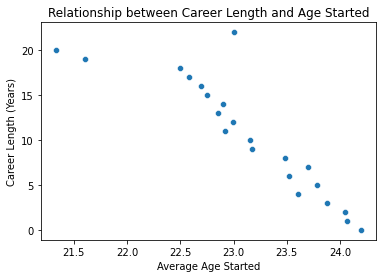

In [16]:
ax = sns.scatterplot(x=mean_ages, y=career)
plt.title('Relationship between Career Length and Age Started')
plt.xlabel('Average Age Started')
plt.ylabel('Career Length (Years)')
plt.savefig("career_age")

According to our data, the younger you start in the NBA, the longer your NBA career will be. This makes sense as players who start when they are younger tend to do so because coaches believe in their ability. But also, since the retirement typically occurs in the 30s, if you start earlier there is more time before your retirement. However, what is interesting is that players who start around 24, have an average career length of 2-3 years, which would mean they retire around 26-27 while the average NBA retirement age is 36-39.

As a result, we will conclude that players from 21 to 22.5 years old are the optimal age group for career longetivity and long term investment.

#### 2. Which colleges produce the best stat players?

In order to answer this question, we will use the season_stats dataset we imported in the beginning and merge it with out player_data dataset. 

In [17]:
# Merging Dataframe on 'name'
season_stats = season_stats.rename(columns={"Player": "name"})
merged = pd.merge(player_data, season_stats, on='name')

In [18]:
# Let's see if we can remove some columns
merged.columns

Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college', 'career_length', 'birth_year', 'age_started',
       'Unnamed: 0', 'Year', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [19]:
# Dropping repetitive or irrelevant columns
merged = merged.drop(columns=['Unnamed: 0','blanl','blank2','Pos','birth_date'])

In [20]:
# Looking at missingess
merged.isna().sum()

name                0
year_start          0
year_end            0
position            0
height              0
weight              0
college             0
career_length       0
birth_year          0
age_started         0
Year                0
Age                 8
Tm                  0
G                   0
GS               5482
MP                443
PER               475
TS%                87
3PAr             4918
FTr               101
ORB%             3139
DRB%             3139
TRB%             2460
AST%             1675
STL%             3139
BLK%             3139
TOV%             4234
USG%             4175
OWS                34
DWS                34
WS                 34
WS/48             475
OBPM             3134
DBPM             3134
BPM              3134
VORP             3134
FG                  0
FGA                 0
FG%               101
3P               4829
3PA              4829
3P%              8324
2P                  0
2PA                 0
2P%               134
eFG%      

Looks like there are a lot of missing stats data. We will have to figure out what we should do with them. 

In [21]:
# Looking at GS (Games Started)
(merged.GS == 0).sum()

5268

We will drop players with 0 games played as the missing values in stats would be due to this. If there are no games played, there will be no stats to obtain. 

In [22]:
merged = merged[merged.GS > 0]
merged.isna().sum()

name                0
year_start          0
year_end            0
position            0
height              0
weight              0
college             0
career_length       0
birth_year          0
age_started         0
Year                0
Age                 0
Tm                  0
G                   0
GS                  0
MP                  0
PER                 0
TS%                 0
3PAr                0
FTr                 0
ORB%                0
DRB%                0
TRB%                0
AST%                0
STL%                0
BLK%                0
TOV%                0
USG%                0
OWS                 0
DWS                 0
WS                  0
WS/48               0
OBPM                0
DBPM                0
BPM                 0
VORP                0
FG                  0
FGA                 0
FG%                 0
3P                  0
3PA                 0
3P%              1540
2P                  0
2PA                 0
2P%                 1
eFG%      

Looks like it solved most of our missingness! 

In [23]:
# Looking at 3P% (3 Point Percentage)
merged[merged["3P%"].isna()].iloc[:,39:42].head()

,3P,3PA,3P%
1,0.0,0.0,NaN
4,0.0,0.0,NaN
70,0.0,0.0,NaN
77,0.0,0.0,NaN
97,0.0,0.0,NaN


Missingness of 3p% is dependent on 3p made and 3p attempts. Since these players never made an attempt to shoot, we want to see what positions these players are typically in to conclude whether or not we should remove these players.

In [24]:
merged[merged["3P"] == 0].position.value_counts()

C      1141
F      1033
F-C     846
C-F     439
G       232
F-G      72
G-F      66
Name: position, dtype: int64

Most players seem to be in the Center or Forward position combination. These positions are notable for driving into the paint and not doing many 3 pters (if any). We will keep these rows. 

Our next step is to determine which stats are suitable metrics of comparisons. We will use Player Win Score as our metric. 


**player win score = 
points + rebounds + steals + .5(assists) + .5(blocked shots) - FG attempts - turnovers - .5(FT attempts) - .5(personal fouls)** 

In [25]:
merged.columns

Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'college', 'career_length', 'birth_year', 'age_started', 'Year', 'Age',
       'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [26]:
merged["player_win_score"] = (merged.PTS + merged.TRB + merged.STL + .5 * merged.AST + 
        .5 * merged.BLK - merged.FGA - merged.TOV - .5 * merged.FTA - .5 * merged.PF)

<AxesSubplot:>

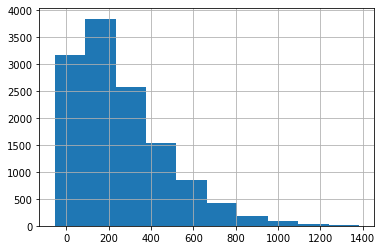

In [27]:
# Distribution of Player Win Scores
merged.player_win_score.hist()

Because there are players with more than one season, we want to get the player_win_score mean for all of the players' seasons. We also want colleges with data on at least 3 players. 

In [28]:
# Removing Colleges with 2 or less players 
min_3 = merged[merged.groupby('college').name.transform('nunique') >= 3].copy()

In [29]:
# Getting mean for players with multiple seasons and dropping the duplicate rows 
mean_player_win_score = min_3.groupby('name')['player_win_score'].mean()
colleges = pd.DataFrame(mean_player_win_score)
name_to_college = min_3[['name','college']].drop_duplicates().set_index("name").copy()

In [30]:
colleges.join(name_to_college).groupby('college')['player_win_score'].mean().sort_values(ascending=False).head()

college
Morehead State University     431.111111
San Diego State University    428.483333
Tennessee State University    423.475000
Virginia Union University     391.563725
Louisiana Tech University     380.401299
Name: player_win_score, dtype: float64

From our results, based on player win score, Louisiana Tech University produces the best players. 

#### 3. How have basketball roles changed over the years?
In this section, we will look at  change in player win score by position, change in 3 point attempts by position, and change in height and weight by position. This way we will be able to observe and analyze a player's technical ability as well as their physicality. 

In [31]:
# Seeing the position names and distribution of positions
merged.position.value_counts()

G      4225
F      3101
F-C    1498
C      1406
G-F    1102
F-G     744
C-F     640
Name: position, dtype: int64

Looks like there are some typos for the position names. For example, C-F should be F-C to represent Forward Center, and F-G should be G-F for Guard Forward.

In [32]:
# Fixing Typos in Positions
merged.position = merged.position.str.replace('C-F','F-C')
merged.position = merged.position.str.replace('F-G','G-F')

#### Player Win Score 

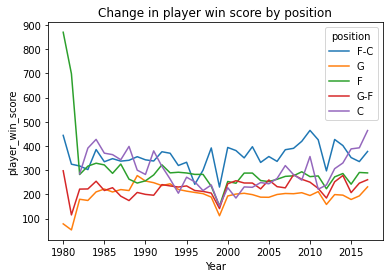

In [33]:
# Looking at player win score 
ax = sns.lineplot(x="Year", y="player_win_score", hue="position",err_style = None,
                  data=merged)
ax.set_title('Change in player win score by position')
plt.savefig("player_win_score")

From this graph, the position that stands out to me is the Center position. It looks like, from the early 2010s, the Center position began to have a bigger impact in winning games. Are centers becoming more offensive over the recent years? Are they becoming more technical with better dribbling and shooting ability? 

#### 3 Point Attempts

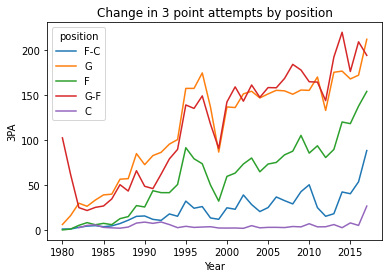

In [34]:
# 3PA and Year 
ax = sns.lineplot(x="Year", y="3PA", hue="position",err_style = None,
                  data=merged)
ax.set_title('Change in 3 point attempts by position')
plt.savefig("3_point_attempts")

It is interesting to see that all positions have increasing in 3 point attempts throughout the years. However, for Centers, it has been a recent development. This goes in line with our graph for player win score. Centers are becoming more offensive and willing to shoot from the 3 point line. This goes for all positions. Basketball is focusing more on shooting rather than driving into the paint and getting a layup. 

#### Weight

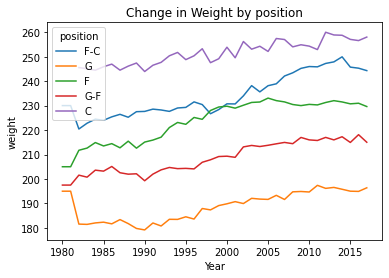

In [35]:
ax = sns.lineplot(x="Year", y="weight", hue="position",err_style = None,
                  data=merged)
ax.set_title('Change in Weight by position')
plt.savefig("weight")

Here, we see that, except for guards, players' weights are increasing as well. It looks like weights for point guards have dipped from 1983 to 1990, and are recovering back to their 1980s weights. As the physicality of the NBA increases, players will look to be stronger and faster through physical and strength training. 

#### Height

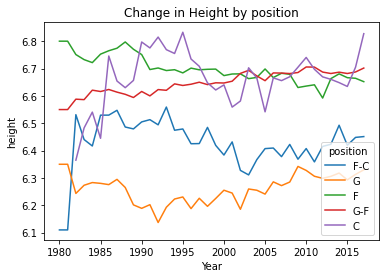

In [36]:
ax = sns.lineplot(x="Year", y=merged.height.str.replace("-",".").astype(float), hue="position",err_style = None,
                  data=merged)
ax.set_title('Change in Height by position')
plt.savefig("height")

From our graph, it is hard to detect any concrete trend, as all positions' heights seem to jump and down.